# **6-3 부스팅 앙상블 모형**

## XGBoost 모델 구현 — 회귀 문제

📌[실습 06-27] 라이브러리 불러오기

In [1]:
!pip install koreanize_matplotlib
import koreanize_matplotlib

import seaborn as sns
import pandas as pd; import numpy as np; import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 48.9 MB/s eta 0:00:00


📌[실습 06-28] 데이터 불러오고 인코딩하기

In [2]:
# 데이터 불러오기
df=pd.read_csv("바이크_임대.csv", encoding="cp949")
y=df["임대_건수"]
X=df.drop(["임대_건수"], axis=1)  # 임대건수 제외하고 모두

# 문자형 피쳐를 라벨 인코딩
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X1=X.copy()  # 원본을 남기기 위해
for idx in X1.select_dtypes(include=["object"]).columns:
    X1[idx] = le.fit_transform(X1[idx])
X1.head(5)

,월,시간대,기온,습도,풍속,자외선,강우량,강설량
0,0,10,-3.2,40,0.5,0.0,0.0,0.0
1,0,16,-3.3,41,0.7,0.0,0.0,0.0
2,0,17,-3.7,42,0.9,0.0,0.0,0.0
3,0,18,-4.0,44,1.0,0.0,0.0,0.0
4,0,19,-4.2,53,1.1,0.0,0.0,0.0


📌[실습 06-29] 데이터 분할하고 모델 학습하기

In [3]:
x_train, x_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# XGBoost  회귀 모델 학습
앙상블3 = XGBRegressor(n_estimators=500,learning_rate=0.05, max_depth=5, random_state=42)
앙상블3.fit(x_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=None, num_parallel_tree=None, ...)

📌[실습 06-30] 예측 정확도를 계산하고 시각화하기

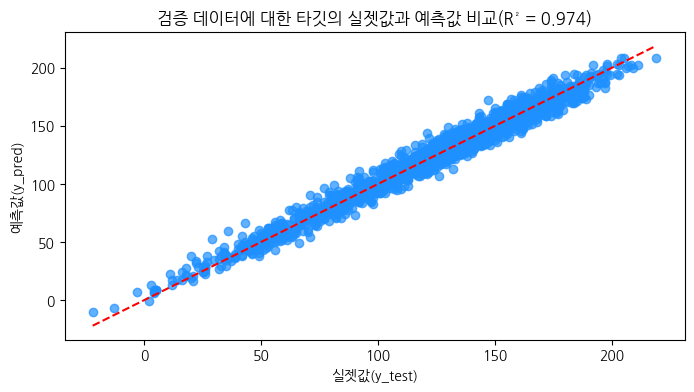

In [4]:
# 검증 타깃 예측
y_pred=앙상블3.predict(x_test)

# 예측 정확도 계산(R-제곱)
r2=r2_score(y_test, y_pred)

# 시각화
plt.figure(figsize=(8, 4))
plt.scatter(y_test, y_pred, color='dodgerblue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='45° Line')
plt.title(f'검증 데이터에 대한 타깃의 실젯값과 예측값 비교(R² = {r2:.3f})')
plt.xlabel('실젯값(y_test)')
plt.ylabel('예측값(y_pred)')
plt.show()

📌[실습 06-31] 피처 중요도 계산하기

[0.082 0.224 0.099 0.012 0.08  0.483 0.004 0.015]


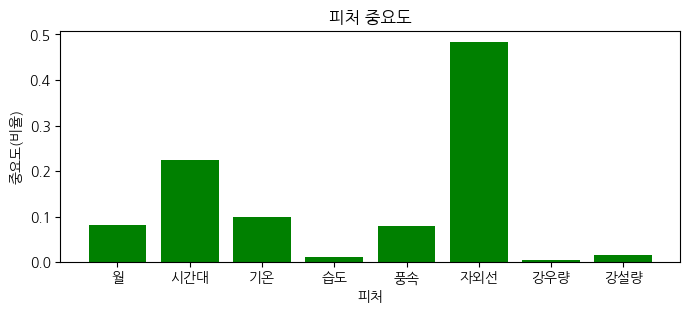

In [6]:
FI=앙상블3.feature_importances_
print(np.round(FI,3))

feature_names=X1.columns
plt.figure(figsize=(8, 3))
plt.bar(feature_names, FI, color="green")
plt.title("피처 중요도"); plt.xlabel("피처"); plt.ylabel("중요도(비율)")
plt.show()

📌[실습 06-32] 피처가 타깃 예측에 미치는 효과 시각화하기 - 기온

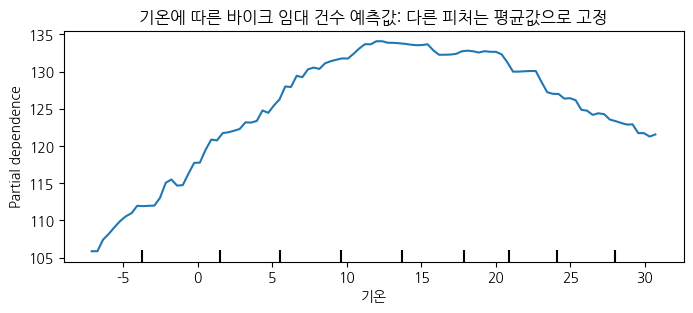

In [ ]:
from sklearn.inspection import PartialDependenceDisplay as PDP

fig, ax=plt.subplots(figsize=(8, 3))
분석_피처="기온"
PDP.from_estimator(앙상블3, X1, features=[분석_피처], kind='average', ax=ax)
plt.title(f"{분석_피처}에 따른 바이크 임대 건수 예측값: 다른 피처는 평균값으로 고정")
plt.show()

📌 여러 피처를 한번에

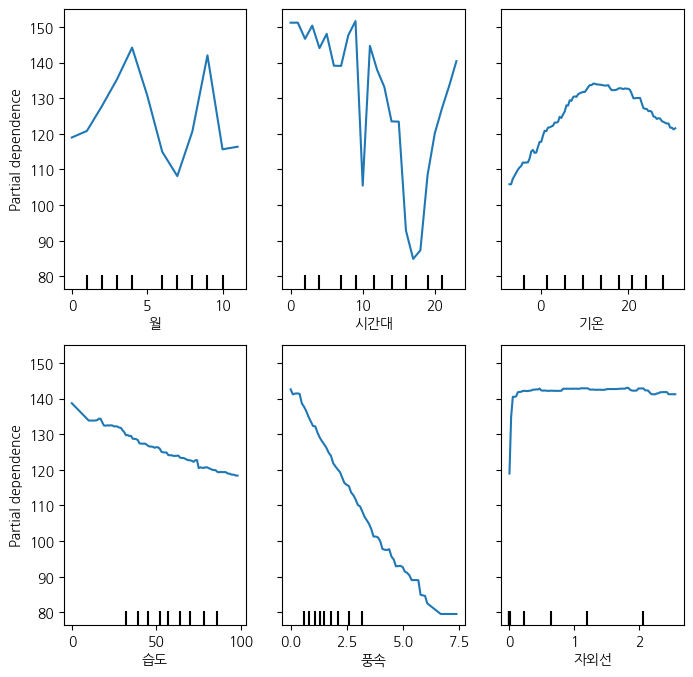

In [ ]:
from sklearn.inspection import PartialDependenceDisplay as PDP

fig, ax=plt.subplots(figsize=(8, 8))
PDP.from_estimator(앙상블3, X1, features=X1.columns[:6], kind='average', ax=ax)  # 처음 6개 피처 선택

## XGBoost 모델 구현 — 분류 문제  

📌[실습 06-33] 라이브러리 불러오기

In [ ]:
import pandas as pd; import numpy as np ; import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

📌[실습 06-34] 데이터 불러오고 인코딩하기

In [ ]:
df=pd.read_csv("와인품질.csv", encoding='cp949')

# 타깃을  라벨 인코딩
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(df['quality'])
X=df.drop(["quality"], axis=1)

📌[실습 06-35] 데이터 분할하고 모델 학습하기

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

앙상블4 =  XGBClassifier(n_estimators=1000, learning_rate=0.05, max_depth=5, random_state=42)  # 튜닝 가능
앙상블4.fit(x_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=1000,
              n_jobs=None, num_parallel_tree=None, ...)

📌 예측 정확도 시각화하기

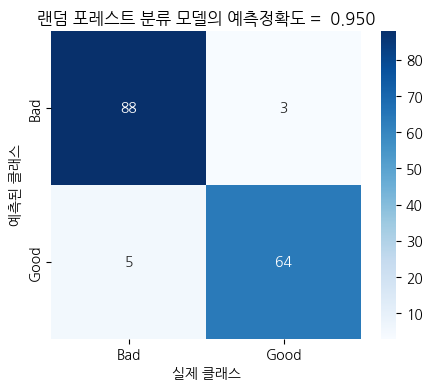

In [ ]:
y_pred=앙상블4.predict(x_test)

from sklearn.metrics import confusion_matrix
import seaborn as sns
class_names=["Bad", "Good"]
cm = pd.crosstab(y_test, y_pred)      # 혼동행렬
acc = accuracy_score(y_test, y_pred)  # 검증용 데이터 분류정확도
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, cmap="Blues", xticklabels=class_names, yticklabels=class_names)

plt.xlabel("실제 클래스"); plt.ylabel("예측된 클래스")
plt.title(f"랜덤 포레스트 분류 모델의 예측정확도 = {acc: .3f}"); plt.show()

📌 피처 중요도 계산하기

[0.0335642  0.17749014 0.02489944 0.02093258 0.02668662 0.05477279
 0.05623675 0.02973327 0.05265542 0.03287532 0.4901535 ]


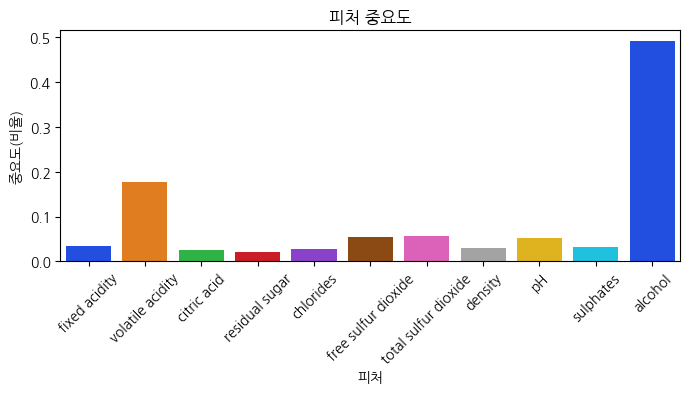

In [ ]:
FI=앙상블4.feature_importances_
print(FI)
feature_names = X.columns

plt.figure(figsize=(8, 3))
sns.barplot(x=feature_names, y=FI, hue=feature_names, palette='bright')

plt.title('피처 중요도')
plt.xlabel('피처'); plt.ylabel('중요도(비율)')
plt.xticks(rotation=45); plt.show()

📌[실습 06-36] 피처가 타깃 예측에 미치는 효과 시각화하기 - 휘발성 산도

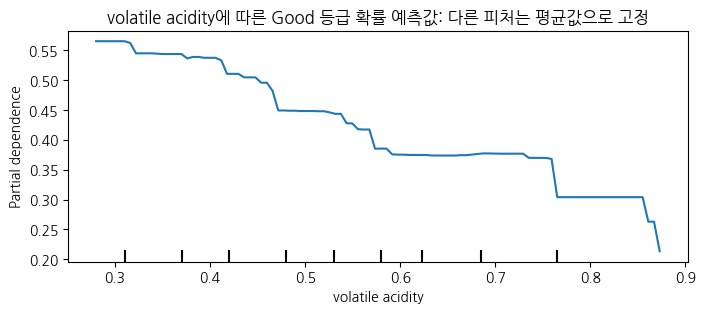

In [ ]:
from sklearn.inspection import PartialDependenceDisplay as PDP

fig, ax=plt.subplots(figsize=(8, 3))
분석_피처="volatile acidity"
PDP.from_estimator(앙상블4, X, features=[분석_피처], kind='average', ax=ax)
plt.title(f"{분석_피처}에 따른 Good 등급 확률 예측값: 다른 피처는 평균값으로 고정")
plt.show()